In [ ]:
import os
import re
import sys

import numpy as np
import matplotlib as mp
import pandas as pd
import scipy as sp
import scipy.stats as spt
import scipy.io as sio
import matplotlib.pyplot as plt

from tasks import dual2afc
from traum import traum as tr
#from traum.mdaio import readmda
#from traum import readDIO
#from traum.readTrodesExtractedDataFile import readTrodesExtractedDataFile as readdat

print(sys.version)

## Behavior

In [ ]:
pathBhv = os.path.join('datasets/dual2afc_ds1/','bhv','M14','M14_Dual2AFC_Nov17_2017_Session1.mat')
dataBhv = dual2afc.parser(sio.loadmat(pathBhv, squeeze_me=True))

In [ ]:
obj = tr.traum(dataBhv)

## Neural

In [ ]:
pathNeur = os.path.join('datasets/dual2afc_ds1/','neur','M14','M14_20171117_175330')

obj.readNeur(pathNeur)

## Sync

In [ ]:
pathDIO = os.path.join('datasets/dual2afc_ds1/','neur','M14','M14_20171117_175330','dio')
obj.readDio(pathDIO)

obj.sync()

## Rasters and PETHs

In [220]:
def raspeth(self,alignment,iUnit,trialMask,panes,window=(-1,2)):
    listAlign = np.array(self.dio['time'][self.dio['state']==0][trialMask]) + np.array(self.bhv[alignment][trialMask])
    spikes = [[]]*len(listAlign)

    for iTrial in range(len(listAlign)):
        temp = self.neur['spikes'][iUnit] - listAlign[iTrial]
        spikes[iTrial] = temp[(temp>=window[0]) & (temp<=window[1])]

    ha_raster, ha_peth = panes
    ha_raster.eventplot(spikes)
    
    counts, edges = np.histogram([item for sublist in spikes for item in sublist], bins='auto', density=False)
    ha_peth.plot(edges[:-1]+(edges[1]-edges[0])/2,counts)
    return counts,edges
    
    
    

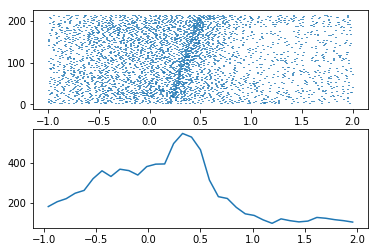

In [221]:
hf, ha = plt.subplots(2,1)

whaa = raspeth(obj,'tsRwd',18,self.bhv.Rewarded.as_matrix(),ha)



In [209]:
x = whaa.get_yticklabels()
x[3]

Text(0,600,u'600')

In [194]:
spikes
x = [item for sublist in spikes for item in sublist]

In [195]:
x

[0.8873666666666651,
 1.210333333333331,
 1.220966666666662,
 1.3391666666666708,
 1.399166666666673,
 -0.8423666666666776,
 -0.8299333333333436,
 -0.7982000000000085,
 -0.5422333333333427,
 -0.21346666666667602,
 -0.20430000000000348,
 -0.18780000000000996,
 -0.1775000000000091,
 0.22939999999999827,
 0.6126000000000005,
 1.1507999999999896,
 1.374299999999991,
 1.6093666666666593,
 1.7585666666666668,
 1.7843999999999909,
 1.7907666666666557,
 1.8046999999999969,
 -0.8410666666666771,
 -0.2065333333333399,
 0.11439999999998918,
 1.3147333333333222,
 1.6673333333333318,
 1.3348333333333358,
 0.7967333333333215,
 1.4679666666666549,
 1.8604333333333045,
 -0.13513333333332866,
 1.2306000000000097,
 1.2382000000000062,
 1.2759000000000071,
 1.7491666666666674,
 1.909700000000015,
 1.5421333333333394,
 1.5792333333333204,
 1.5907333333333327,
 1.6771333333333303,
 1.6862999999999886,
 1.7032000000000096,
 1.706166666666661,
 1.725833333333327,
 1.7301999999999964,
 1.7462666666666564,
 1.

In [ ]:
plt.hist(x, weights=np.full(len(listAlign),1.0/len(listAlign)), bins='auto', histtype='step', density=False)

0.004651162790697674

In [191]:
np.full(len(listAlign),1.0/len(listAlign),dtype=float)

array([0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465116,
       0.00465116, 0.00465116, 0.00465116, 0.00465116, 0.00465

In [ ]:
whaa.get_yd

In [ ]:
flat_list

In [ ]:
type(whaa[0])

In [ ]:
self = obj
alignment = 'tsRwd'
iUnit = 0
trialMask = self.bhv.Rewarded.as_matrix()
window = (-1, 2)


In [ ]:

hf, ha = plt.subplots(2,1)

In [ ]:
ha[0].eventplot(spikes)
plt.show()

In [ ]:
ha.eventplot(spikes,lineoffsets=list(range(len(listAlign))))

In [ ]:
plt.eventplot(spikes.values,lineoffsets=spikes.index.values)

In [ ]:
hisPkL = []
hisPkR = []
hisPkC = []
hisTone = []
hisRwd = []

haRaster, haHist = panes

iRow = 0;
for i in np.argsort(data.ChoiceLeft).values :
    haRaster.eventplot([data.tsPokeL[i]-listAlign[i]], lineoffsets=iRow, colors='xkcd:mango')
    haRaster.eventplot([data.tsPokeR[i]-listAlign[i]], lineoffsets=iRow, colors='xkcd:darkish green')
    haRaster.eventplot([data.tsPokeC[i]-listAlign[i]], lineoffsets=iRow, colors='xkcd:scarlet')
    haRaster.eventplot([data.tsRwdTone[i]-listAlign[i]], lineoffsets=iRow, colors='xkcd:charcoal')
    haRaster.eventplot([data.tsRwd[i]-listAlign[i]], lineoffsets=iRow, colors='xkcd:water blue')
    iRow += 1

    hisPkL = np.hstack((hisPkL,data.tsPokeL[i]-listAlign[i]))
    hisPkR = np.hstack((hisPkR,data.tsPokeR[i]-listAlign[i]))
    hisPkC = np.hstack((hisPkC,data.tsPokeC[i]-listAlign[i]))
    hisTone = np.hstack((hisTone,data.tsRwdTone[i]-listAlign[i]))
    hisRwd = np.hstack((hisRwd,data.tsRwd[i]-listAlign[i]))

haHist.hist(hisPkL, bins='auto', histtype='step', color='xkcd:mango', density=False)
haHist.hist(hisPkR, bins='auto', histtype='step', color='xkcd:darkish green', density=False)
haHist.hist(hisPkC, bins='auto', histtype='step', color='xkcd:scarlet', density=False)
haHist.hist(hisTone, histtype='step', color='xkcd:charcoal', density=False)
haHist.hist(hisRwd, histtype='step', color='xkcd:water blue', density=False)

In [ ]:
tsBhv

In [ ]:
for i in range(len(tsBhv)):
    print(tsBhv.iloc[i],tsDio.iloc[i])

In [ ]:
tsDio = obj.dio['time'][obj.dio['state']==0]
tsBhv = obj.bhv['tsState0']-obj.bhv['tsState0'][0]
plt.plot(np.array(tsBhv)[0:10]-np.array(tsDio)[0:10])